Lab 7 - Model comparison
Agata Swatowska

In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import os

In [4]:
F = 5
L = 9
N = (F+L)*100

Zad 1.
1. Compile code_1.stan and code_2.stan
2. Generate data for rest of excercises.

In [2]:
model_1 = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:compiling stan file C:\DataAnalytics_VSC\DataAnalytics\lab7\code_1.stan to exe file C:\DataAnalytics_VSC\DataAnalytics\lab7\code_1.exe
INFO:cmdstanpy:compiled model executable: C:\DataAnalytics_VSC\DataAnalytics\lab7\code_1.exe


In [3]:
model_2 = CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:compiling stan file C:\DataAnalytics_VSC\DataAnalytics\lab7\code_2.stan to exe file C:\DataAnalytics_VSC\DataAnalytics\lab7\code_2.exe
INFO:cmdstanpy:compiled model executable: C:\DataAnalytics_VSC\DataAnalytics\lab7\code_2.exe


In [19]:
sim_1=model_1.sample(data={'N':N},  
                    chains=1, 
                    fixed_param=True,
                    iter_warmup=0)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:02 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [9]:
sim_2=model_2.sample(data={'N':N}, 
                    chains=1, 
                    fixed_param=True,
                    iter_warmup=0)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:09 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


Zad 2.
1. Compile both models (code_3, code_4)
2. Fit both models
3. Using az.compare and az.plot_compare analyze both models using loo and waic criteria.

In [11]:
model_3 = CmdStanModel(stan_file='code_3.stan')
model_4 = CmdStanModel(stan_file='code_4.stan')


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiling stan file C:\DataAnalytics_VSC\DataAnalytics\lab7\code_4.stan to exe file C:\DataAnalytics_VSC\DataAnalytics\lab7\code_4.exe
INFO:cmdstanpy:compiled model executable: C:\DataAnalytics_VSC\DataAnalytics\lab7\code_4.exe


In [22]:
y_1 = sim_1.stan_variable('y')[0]
sim_3=model_3.sample(data={'N':N, 'y':y_1},  
                    chains=1, 
                    fixed_param=True,
                    iter_warmup=0)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:04 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [23]:
sim_4=model_4.sample(data={'N':N, 'y':y_1},  
                    chains=1, 
                    fixed_param=True,
                    iter_warmup=0)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:04 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [37]:
def compare_az(comp_dict, crit='loo'):
    comp = az.compare(comp_dict, ic=crit)
    print(comp)
    az.plot_compare(comp)

In [36]:
# Using az.compare and az.plot_compare analyze 
# both models using loo and waic criteria.
compare_dict = {'model3': sim_3, 'model4': sim_4}


E:\ProgramData\Anaconda3\envs\env_da\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
E:\ProgramData\Anaconda3\envs\env_da\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


        rank         loo  p_loo       d_loo    weight          se        dse  \
model3     0 -2887.31104    0.0     0.00000  0.999511  312.392265    0.00000   
model4     1 -4019.42442    0.0  1132.11338  0.000489    5.708461  306.81052   

        warning loo_scale  
model3     True       log  
model4     True       log  


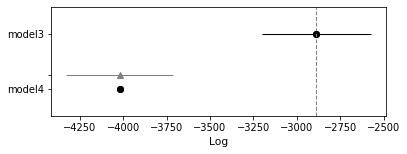

In [38]:
compare_az(comp_dict=compare_dict)

        rank        waic        p_waic      d_waic    weight          se  \
model3     0 -2887.31104  4.620768e-23     0.00000  0.999511  312.392265   
model4     1 -4019.42442  2.087356e-24  1132.11338  0.000489    5.708461   

              dse  warning waic_scale  
model3    0.00000    False        log  
model4  306.81052    False        log  


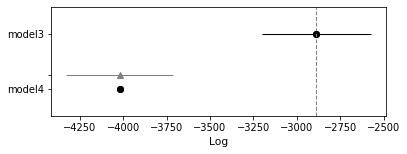

In [39]:
compare_az(compare_dict, crit='waic')


Zad 3.
1. Compile model
2. Compare models for 1, 2 and 3 predictors as in previous excercise

In [33]:
model_5 = CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:compiling stan file C:\DataAnalytics_VSC\DataAnalytics\lab7\code_5.stan to exe file C:\DataAnalytics_VSC\DataAnalytics\lab7\code_5.exe
INFO:cmdstanpy:compiled model executable: C:\DataAnalytics_VSC\DataAnalytics\lab7\code_5.exe


In [46]:
y_2 = sim_2.stan_variable('y')[0]
X_2 = sim_2.stan_variable('X')
sim_51=model_5.sample(data={'N':N, 'K': 1,'y': y_2, 'X': X_2[0,:,0:1]},  
                    chains=1, 
                    fixed_param=True,
                    iter_warmup=0)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:06 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [47]:
sim_52=model_5.sample(data={'N':N, 'K': 2,'y': y_2, 'X': X_2[0,:,0:2]},  
                    chains=1, 
                    fixed_param=True,
                    iter_warmup=0)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:06 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [48]:
sim_53=model_5.sample(data={'N':N, 'K': 3,'y': y_2, 'X': X_2[0,:,0:3]},  
                    chains=1, 
                    fixed_param=True,
                    iter_warmup=0)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:06 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


E:\ProgramData\Anaconda3\envs\env_da\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
E:\ProgramData\Anaconda3\envs\env_da\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
E:\ProgramData\Anaconda3\envs\env_da\lib\site-packages\arv

        rank            loo  p_loo          d_loo    weight           se  \
pred_3     0   -3736.955600    0.0       0.000000  0.688362    31.405361   
pred_2     1   -9341.897557    0.0    5604.941957  0.311638   360.238713   
pred_1     2 -113629.685698    0.0  109892.730098  0.000000  4280.220145   

                dse  warning loo_scale  
pred_3     0.000000     True       log  
pred_2   334.061645     True       log  
pred_1  4249.172409     True       log  


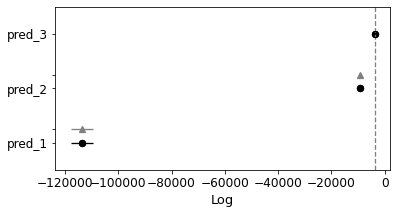

In [49]:
compar_dict_pre = {'pred_1': sim_51, 'pred_2': sim_52, 'pred_3': sim_53}
compare_az(compar_dict_pre)

        rank           waic        p_waic         d_waic    weight  \
pred_3     0   -3736.955600  1.945683e-24       0.000000  0.688362   
pred_2     1   -9341.897557  3.450453e-23    5604.941957  0.311638   
pred_1     2 -113629.685698  4.663786e-21  109892.730098  0.000000   

                 se          dse  warning waic_scale  
pred_3    31.405361     0.000000    False        log  
pred_2   360.238713   334.061645    False        log  
pred_1  4280.220145  4249.172409    False        log  


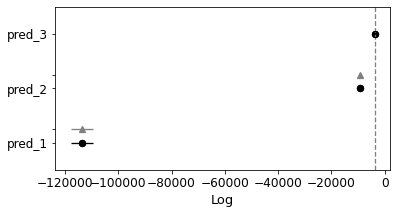

In [50]:
compare_az(compar_dict_pre, crit='waic')